In [1]:
# Fourier and Inverse transform of images
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
from matplotlib.colors import LogNorm

In [2]:
image = Image.open('wf.jpg')
print(image.size)
# store image to array
img_arr = np.array(image)
# remove third dimension of the image, if it has
img = img_arr[:,:,2] 
# array to image
im = Image.fromarray(img)
print(im.size)

(750, 500)
(750, 500)


In [3]:
# resize image
nimg = image.resize((800, 1050))
nimg.show()

<Figure size 432x288 with 0 Axes>

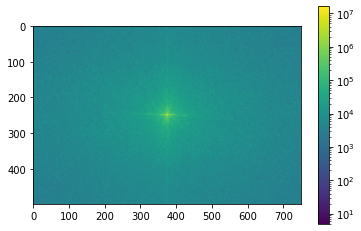

<Figure size 432x288 with 0 Axes>

In [4]:
im_fft = fftpack.fftshift(fftpack.fft2(im))
plt.imshow(abs(im_fft), norm=LogNorm(vmin=5))
plt.colorbar()
plt.figure()

In [5]:
# filter FFt truncate coefficients
keep_fraction = 0.9
im_fft2 = im_fft.copy()
r, c = im_fft2.shape

im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

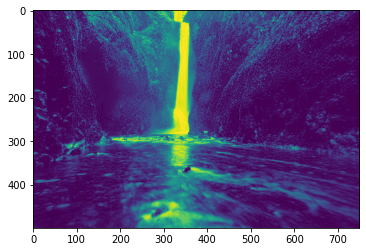

In [6]:
in_fft = fftpack.ifft2(im_fft2).real
plt.figure()
plt.imshow(abs(in_fft))

In [7]:
fft_im = Image.fromarray(abs(in_fft))
fft_im .show()